Load Data

In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("XYZloan_default_selected_vars.csv")
data.tail()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
79995,79995,79996,79996,0,39,2,1,12,2017/5/7 13:44,android,...,15.0,8.0,864.0,684.0,1261.0,764.0,2600.0,1074.0,11.0,OPPO
79996,79996,79997,79997,0,31,1,4,12,2017/6/2 15:54,ios,...,25.0,25.0,6177.0,6177.0,6426.0,6426.0,6426.0,6426.0,6.0,IPHONE7
79997,79997,79998,79998,0,37,1,1,12,2017/7/9 8:40,android,...,14.0,13.0,1116.0,1116.0,2061.0,2061.0,2501.0,2061.0,12.0,VIVO
79998,79998,79999,79999,0,38,2,1,12,2017/5/9 10:19,android,...,5.0,2.0,25.0,0.0,498.0,343.0,514.0,343.0,6.0,XIAOMI
79999,79999,80000,80000,1,25,1,3,12,2017/4/27 18:36,h5,...,9.0,9.0,129.0,129.0,167.0,167.0,167.0,167.0,7.0,WEB


In [3]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'MB007'],
      dtype='object')

In [4]:
data.dtypes
print(data.dtypes)

Unnamed: 0        int64
Unnamed: 0.1      int64
id                int64
loan_default      int64
AP001             int64
                 ...   
CD170           float64
CD172           float64
CD173           float64
MB005           float64
MB007            object
Length: 89, dtype: object


In [5]:
data = data.drop(['Unnamed: 0','Unnamed: 0.1','id'], axis=1)

In [6]:
APs = ['AP001', 'AP003', 'AP008']
CRs = ['CR009', 'CR015', 'CR019']
PAs = ['PA022', 'PA023', 'PA029']
TDs = ['TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']
var = APs + CRs + PAs + TDs
target = ['loan_default']
data = data[var + target]
data

,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,loan_default
0,31,1,3,35807,4,2,-1.0,-1.0,-98.0,1,4,1,5,1,2,1
1,27,1,4,7254,6,11,-1.0,-1.0,-98.0,2,3,1,3,1,2,0
2,33,4,2,30377,2,3,-1.0,-1.0,-98.0,2,4,1,5,1,1,0
3,34,4,5,0,5,8,-1.0,-1.0,-98.0,0,0,0,0,0,1,0
4,47,1,4,0,6,11,-99.0,-99.0,-99.0,2,2,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,39,1,3,16716,5,6,-1.0,-1.0,-98.0,2,2,0,4,0,3,0
79996,31,4,4,3388,5,5,-1.0,-1.0,-98.0,0,2,0,2,0,0,0
79997,37,1,3,0,3,6,-1.0,-1.0,-98.0,1,1,2,1,2,2,0
79998,38,1,2,20200,4,5,-1.0,-1.0,-98.0,0,0,0,0,0,0,0


In [7]:
data.isnull().sum()

AP001             0
AP003             0
AP008             0
CR009             0
CR015             0
CR019             0
PA022           381
PA023           381
PA029           381
TD001             0
TD005             0
TD006             0
TD009             0
TD010             0
TD014             0
loan_default      0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(
    data, test_size=0.40, random_state=42)

In [9]:
data = data[data['PA022'].notnull()]
data = data[data['PA023'].notnull()]
data = data[data['PA029'].notnull()]
train['AP003'] = train['AP003'].astype('category',copy=False)
train['AP008'] = train['AP008'].astype('category',copy=False)
train['CR009_C'] = pd.cut(train['CR009'],5,duplicates='drop')
train['PA022_C'] = pd.cut(train['PA022'],5,duplicates='drop')
train['PA023_C'] = pd.cut(train['PA023'],5,duplicates='drop')
train['PA029_C'] = pd.cut(train['PA029'],5,duplicates='drop')

Add WOE

In [15]:
#!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 719 kB/s 


In [16]:
import category_encoders as ce
ec = ce.WOEEncoder()
train_woe= train[['loan_default','AP001','AP003', 'AP008','CR009_C', 'CR015', 'CR019','PA022_C', 'PA023_C', 'PA029_C','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']]
var_c = ('AP003', 'AP008','CR009_C','PA022_C', 'PA023_C', 'PA029_C')

In [17]:
for i in var_c:
    X = train_woe[i]
    y = train_woe['loan_default']
    x_WOE = ec.fit(X, y)
    x_cleaned = ec.transform(X).round(2)
    df_woe = pd.DataFrame()
    df_woe[i] = train_woe[i]
    df_woe[i+'_woe'] = x_cleaned
    df_woe = df_woe.drop_duplicates()
    train_woe = pd.merge(train_woe, df_woe, on = i, how = 'left')

In [18]:
var = pd.DataFrame(train.dtypes)
var.head(10)

,0
AP001,int64
AP003,category
AP008,category
CR009,int64
CR015,int64
CR019,int64
PA022,float64
PA023,float64
PA029,float64
TD001,int64


In [19]:
var = pd.DataFrame(train.dtypes).reset_index()
var.head()

,index,0
0,AP001,int64
1,AP003,category
2,AP008,category
3,CR009,int64
4,CR015,int64


In [20]:
var.columns = ['varname','dtype']
var.head(10)

,varname,dtype
0,AP001,int64
1,AP003,category
2,AP008,category
3,CR009,int64
4,CR015,int64
5,CR019,int64
6,PA022,float64
7,PA023,float64
8,PA029,float64
9,TD001,int64


In [21]:
var['source'] = var['varname'].str[:2]
var.head()

,varname,dtype,source
0,AP001,int64,AP
1,AP003,category,AP
2,AP008,category,AP
3,CR009,int64,CR
4,CR015,int64,CR


In [22]:
var['source'].value_counts()

PA    6
TD    6
CR    4
AP    3
lo    1
Name: source, dtype: int64

In [23]:
# "AP004" is a bad data field and should be removed.
MB_list = list(var[var['source']=='MB']['varname'])
AP_list = list(var[(var['source']=='AP') & (var['varname']!='AP004')]['varname'])
TD_list = list(var[var['source']=='TD']['varname'])
CR_list = list(var[var['source']=='CR']['varname'])
PA_list = list(var[var['source']=='PA']['varname'])
CD_list = list(var[var['source']=='CD']['varname'])
AP_list

['AP001', 'AP003', 'AP008']

In [24]:
train['loan_default'].value_counts(dropna=False)

0    38736
1     9264
Name: loan_default, dtype: int64

# RF Model without any sampling

H2O’s Stacked Ensemble method is a supervised ensemble machine learning algorithm that finds the optimal combination of a collection of prediction algorithms using a process called stacking.

In [26]:
#!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.5 MB 47 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.3-py2.py3-none-any.whl size=177541401 sha256=956ad58824a4046010b20c9a92dba041e4658292b07764721565e685daa9fb7f
  Stored in directory: /root/.cache/pip/wheels/16/f8/f4/69e1ff6a0d1cb61bdbc0d9888ee8437a1acf1eb1c6ffb8be20
Successfully built h2o


In [27]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpesfkqdxz
  JVM stdout: /tmp/tmpesfkqdxz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpesfkqdxz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_unknownUser_kohq7j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [28]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [29]:
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [30]:
predictors = CR_list + TD_list + AP_list + MB_list + CR_list + PA_list
target='loan_default'

In [31]:
rf_v1 = H2ORandomForestEstimator(
    model_id = 'rf_v1',
    ntrees = 300,
    nfolds=10,
    min_rows=100,
    seed=1234)
rf_v1.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_v1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         100965                 5            10           7.21          19            25            21.9067

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.14800042015001666
RMSE: 0.38470822729702137
MAE: 0.2966686854758597
RMSLE: 0.26969095574394397
Mean Residual Deviance: 0.14800042015001666

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.14820249115684556
RMSE: 0.38497076662630575
MAE: 0.2971199592307889
RMSLE: 0.26991066181470647
Mean Residual Deviance: 0.14820249115684556

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.297016   0.0107195   0.291465      0.290162      0.301415      0.300775      0.294374      0.315054      0.285534      0.300952      0.280438      0.309992
mean_residual_deviance  0.148038   0.0121466   0.14151       0.142027      0.153517      0.153322      0.145178      0.168598      0.133315      0.150195      0.130033      0.16269
mse                     0.148038   0.0121466   0.14151       0.142027      0.153517      0.153322      0.145178      0.168598      0.133315      0.150195      0.130033      0.16269
r2                      0.0260803  0.0165599   0.00486601    0.0360175     0.0318778     0.0358655     0.056415      0.0212298     0.00764375    0.00600682    0.0361552     0.024725
residual_deviance       0.148038   0.0121466   0.14151       0.142027      0.153517      0.153322      0.145178      0.168598      0.133315      0.150195      0.130033      0.16269
rmse                    0.384467   0.0157613   0.376178      0.376865      0.391812      0.391564      0.381022      0.410607      0.365123      0.38755       0.360601      0.403349
rmsle                   0.269699   0.00840525  0.266491      0.264785      0.273254      0.272705      0.266408      0.283635      0.260637      0.272985      0.256293      0.279802

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2022-12-07 04:51:51  43.098 sec  0.0                nan                  nan                  nan
     2022-12-07 04:51:51  43.162 sec  1.0                0.3944477874645105   0.2990887360488392   0.15558905703564763
     2022-12-07 04:51:51  43.199 sec  2.0                0.3954564393358355   0.29993200470772424  0.15638579541217734
     2022-12-07 04:51:51  43.218 sec  3.0                0.39110168886767827  0.2968900952316184   0.1529605310351502
     2022-12-07 04:51:51  43.233 sec  4.0                0.39017815119032867  0.29649116691886773  0.15223898966630298
     2022-12-07 04:51:51  43.249 sec  5.0                0.38980264240531426  0.29694392208979675  0.15194610002616532
     2022-12-07 04:51:51  43.265 sec  6.0                0.3896651003524521   0.2978806865969682   0.15183889043268656
     2022-12-07 04:51:51  43.282 sec  7.0                0.3882590348990915   0.29688271451826476  0.15074507818077396
     2022-12-07 04:51:51  43.305 sec  8.0                0.3873738308700734   0.2960176398400419   0.1500584848429562
     2022-12-0

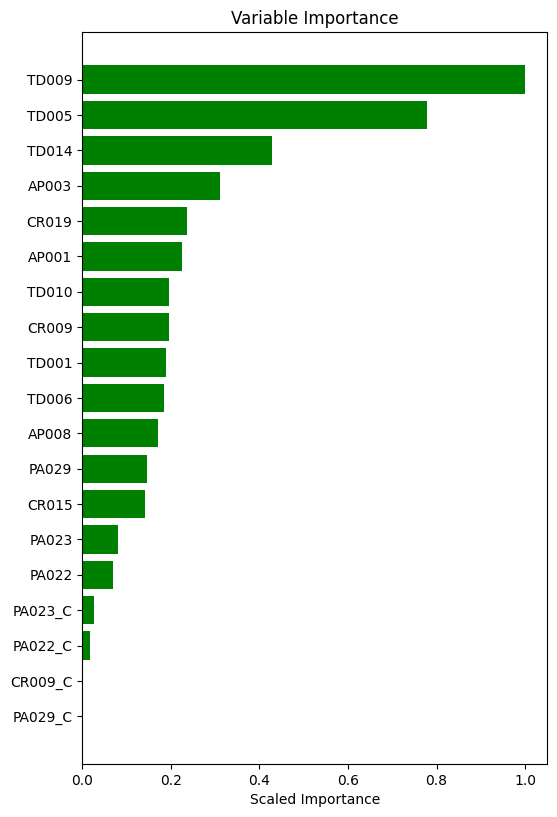

In [32]:
def VarImp(model_name):

    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (6,len(variables)/2))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title('Variable Importance')
    plt.show()

VarImp(rf_v1)

In [33]:
predictions = rf_v1.predict(test_hex)
predictions.head()
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,loan_default,predict
0,0,0.277388
1,0,0.161412
2,0,0.132443
3,0,0.131183
4,0,0.107043


In [34]:
def createGains(model):
    predictions = model.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(rf_v1)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,95,225,320,95,225,0.16,0.09,60.0,1.58,7.0,29.69
1,320,96,224,640,191,449,0.32,0.17,120.0,1.59,15.0,29.84
2,320,74,246,960,265,695,0.44,0.27,180.0,1.47,17.0,27.60
3,320,73,247,1280,338,942,0.56,0.36,240.0,1.41,20.0,26.41
4,320,65,255,1600,403,1197,0.67,0.46,300.0,1.34,21.0,25.19
5,320,50,270,1920,453,1467,0.76,0.56,360.0,1.26,20.0,23.59
6,320,45,275,2240,498,1742,0.83,0.67,420.0,1.19,16.0,22.23
7,320,36,284,2560,534,2026,0.89,0.78,480.0,1.11,11.0,20.86
8,320,32,288,2880,566,2314,0.94,0.89,540.0,1.05,5.0,19.65


In [35]:
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df).as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)

    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')

    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



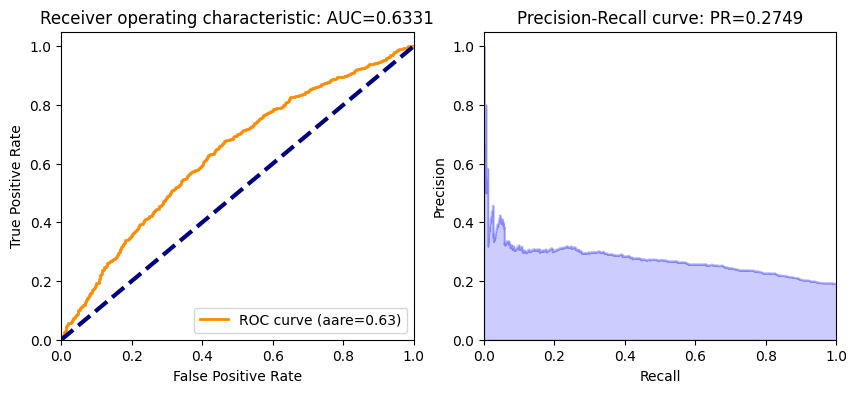

In [36]:
ROC_AUC(rf_v1,test_hex,'loan_default')

We can see that the AUC value is 0.6331 and precision-recall curve is 0.2749.

Here we test hyper-parameters

In [37]:
predictions = rf_v1.predict(test_hex)
predictions.head()
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,loan_default,predict
0,0,0.277388
1,0,0.161412
2,0,0.132443
3,0,0.131183
4,0,0.107043


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



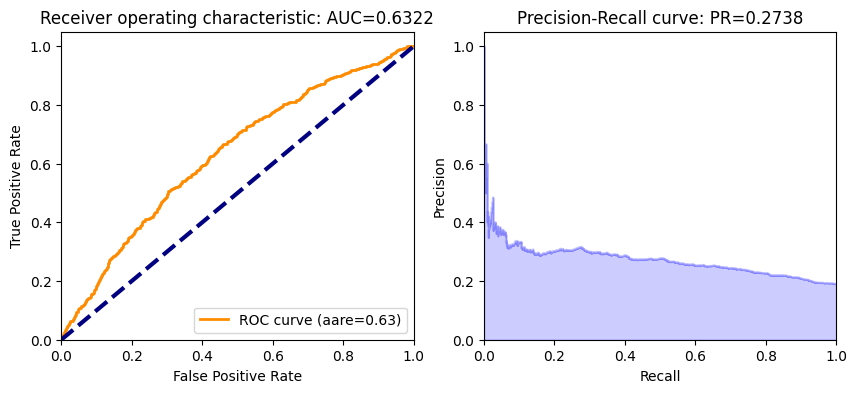

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



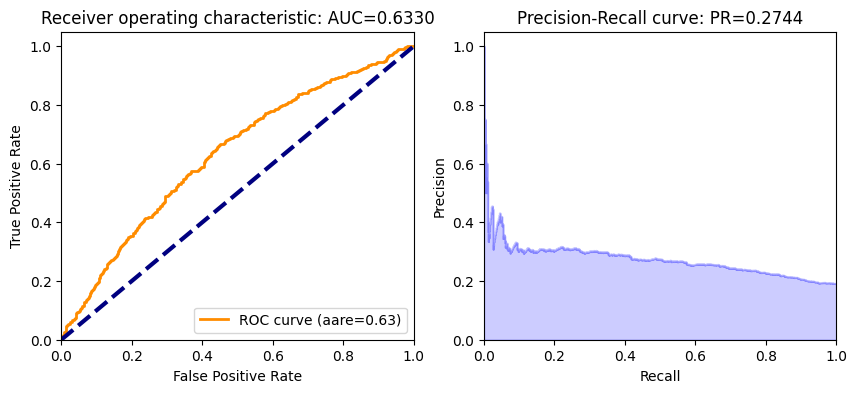

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



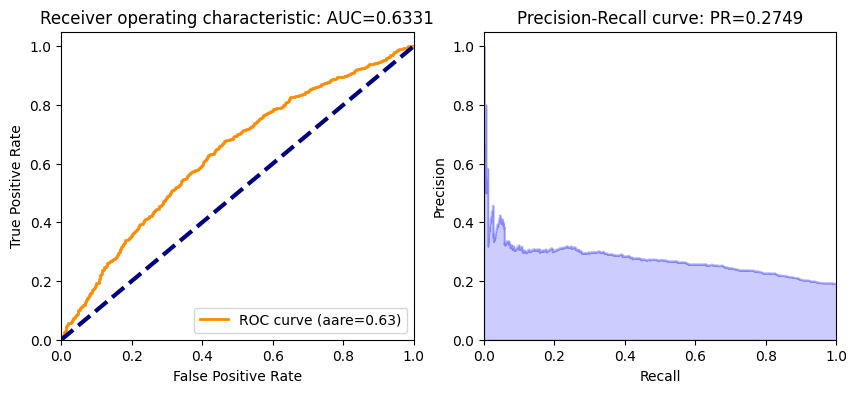

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



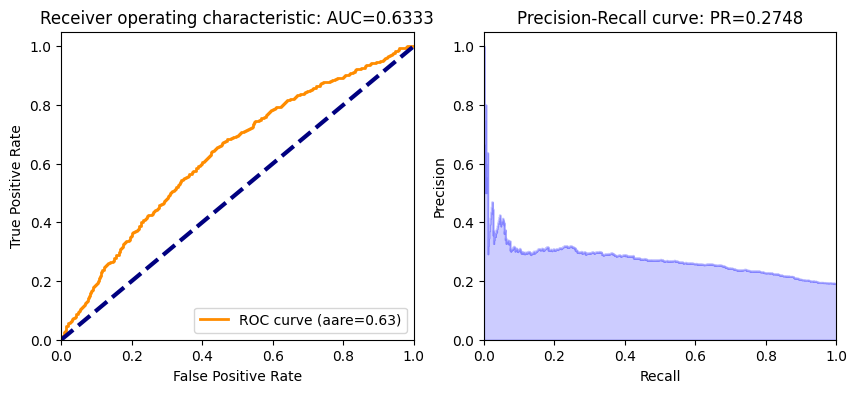

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



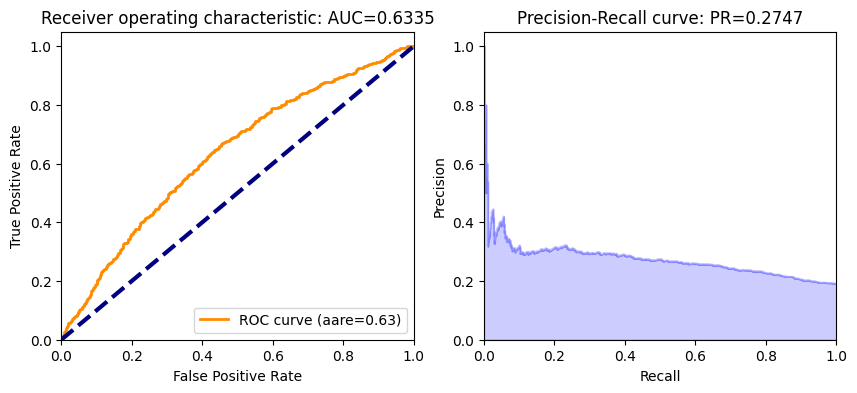

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



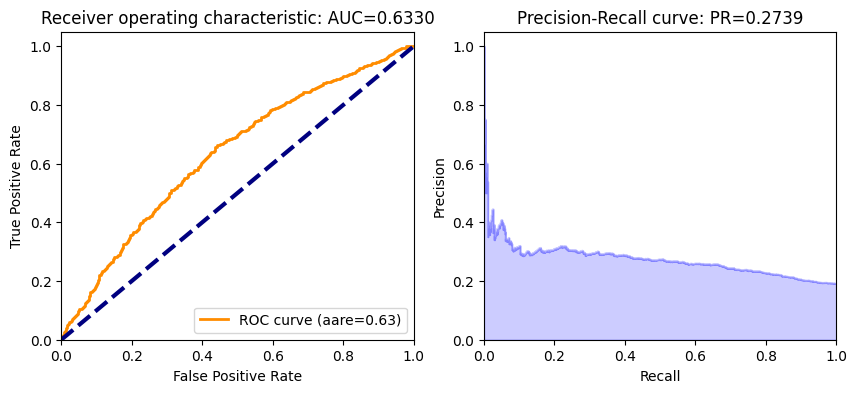

In [38]:
# build multiple models using a loop
i = 1
models = []
for k in (100,200,300,400,500,600):
    i = i+1
    model_id = 'rf_v'+ str(i)
    model = H2ORandomForestEstimator(
        model_id = model_id,
        ntrees = k,
        nfolds=10,
        min_rows = 100,
        seed=1234)
    model.train(predictors,target,training_frame=train_hex)
    predictions = model.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
    createGains(model)
    ROC_AUC(model,test_hex,'loan_default')

By testing the number of trees of the model, we can see that the best AUC value is when ntree is 500 and the precision recall value is the best when ntree is 600.

# Undersampling

Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class.

In [39]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
train

,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,loan_default,CR009_C,PA022_C,PA023_C,PA029_C
36421,33,1,2,116000,6,11,91.0,91.0,136.000000,1,5,3,8,4,4,1,"(-1420.3, 284060.0]","(9.8, 118.6]","(9.8, 118.6]","(-101.971, 495.2]"
41239,26,4,1,102520,5,11,-1.0,-1.0,-98.000000,2,2,0,3,2,3,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
1727,34,1,3,0,6,5,-1.0,-1.0,-98.000000,1,2,1,4,2,2,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
69197,31,3,4,5000,5,5,22.0,22.0,58.333333,6,6,1,6,1,1,0,"(-1420.3, 284060.0]","(9.8, 118.6]","(9.8, 118.6]","(-101.971, 495.2]"
25292,36,1,4,43700,5,5,-1.0,-1.0,-98.000000,1,7,1,8,1,1,1,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,25,3,3,12000,5,3,-1.0,-1.0,-98.000000,4,4,1,5,1,2,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
54886,31,3,4,60300,6,5,69.0,-1.0,39.000000,2,4,1,5,1,1,0,"(-1420.3, 284060.0]","(9.8, 118.6]","(-99.544, 9.8]","(-101.971, 495.2]"
76820,28,3,2,45167,5,3,-1.0,-1.0,-98.000000,2,13,3,14,3,3,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
860,28,1,5,59111,6,11,-1.0,-1.0,-98.000000,1,2,2,8,2,2,1,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"


In [62]:
y = train_smpl[target]
X = train_smpl.drop(target,axis=1)
y.dtypes

dtype('int64')

In [66]:
y1_cnt = train_smpl[target].sum()
y1_cnt

902

In [73]:
train_smpl

,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,loan_default,CR009_C,PA022_C,PA023_C,PA029_C
61759,24,4,3,16100,3,2,-1.0,-1.0,-98.000000,0,1,2,4,4,3,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
74960,26,3,5,54900,2,4,-1.0,-1.0,-98.000000,4,4,6,6,6,6,1,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
55267,32,1,5,0,3,3,35.0,35.0,0.000000,3,4,1,4,1,1,1,"(-1420.3, 284060.0]","(9.8, 118.6]","(9.8, 118.6]","(-101.971, 495.2]"
30261,49,3,3,220000,6,10,25.0,-1.0,-98.000000,2,8,7,9,9,9,0,"(-1420.3, 284060.0]","(9.8, 118.6]","(-99.544, 9.8]","(-101.971, 495.2]"
42167,23,3,2,28178,5,7,-1.0,-1.0,-98.000000,2,4,0,6,0,0,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18527,31,3,5,46400,4,10,-1.0,-1.0,-98.000000,3,5,2,12,4,7,1,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
60892,25,3,4,6500,2,3,-1.0,-1.0,-98.000000,3,8,1,8,1,1,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
28141,28,3,2,16278,5,4,59.0,-1.0,36.000000,2,3,1,5,1,2,1,"(-1420.3, 284060.0]","(9.8, 118.6]","(-99.544, 9.8]","(-101.971, 495.2]"
68763,33,1,1,11100,5,3,-1.0,-1.0,-98.000000,0,2,1,7,5,7,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"


In [67]:
N = 2
y0_cnt = y1_cnt * N
y0_cnt

1804

In [68]:
from imblearn.datasets import make_imbalance
X_rs, y_rs = make_imbalance(X, y,
                            sampling_strategy={1:y1_cnt , 0:  y0_cnt},
                            random_state=0)
X_rs = pd.DataFrame(X_rs)
y_rs = pd.DataFrame(y_rs)

In [75]:
y_rs = train_smpl[train_smpl[target]==1]
X_rs = train_smpl[train_smpl[target]==0].sample(n=y0_cnt)
smpl = pd.concat([X_rs,y_rs])
smpl_hex = h2o.H2OFrame(smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [76]:
smpl_hex

AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,loan_default,CR009_C,PA022_C,PA023_C,PA029_C
23,3,2,62001,5,12,-1,-1,-98,4,4,1,7,1,2,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
28,3,3,0,5,9,43,43,-98,2,2,0,4,0,0,0,"(-1420.3, 284060.0]","(9.8, 118.6]","(9.8, 118.6]","(-101.971, 495.2]"
23,1,1,10961,4,3,-1,-1,-98,2,6,3,11,6,10,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
40,1,5,7500,3,3,-1,-1,-98,2,3,0,3,0,2,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
36,1,3,6718,5,2,-1,-1,-98,2,2,0,4,2,2,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
32,1,3,3500,3,5,-1,-1,-98,2,2,0,3,1,1,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
28,4,3,36624,6,12,-1,-1,-98,1,1,2,1,2,1,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
32,4,4,13000,6,5,-1,-1,-98,3,3,1,6,2,3,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"
28,4,3,48637,5,5,73,73,19.5,1,2,1,4,1,1,0,"(-1420.3, 284060.0]","(9.8, 118.6]","(9.8, 118.6]","(-101.971, 495.2]"
28,3,2,41439,6,9,-1,-1,-98,3,4,2,7,4,6,0,"(-1420.3, 284060.0]","(-99.544, 9.8]","(-99.544, 9.8]","(-101.971, 495.2]"


In [77]:
rf_v4 = H2ORandomForestEstimator(
    model_id = 'rf_v4',
    ntrees = 500,
    nfolds=10,
    min_rows=100,
    seed=1234)
rf_v4.train(predictors,target,training_frame=smpl_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_v4


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    500                500                         107640                 4            9            5.526         9             14            12.362

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.21264523481454914
RMSE: 0.46113472523173654
MAE: 0.4280861192584536
RMSLE: 0.3242112408796161
Mean Residual Deviance: 0.21264523481454914

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.2132764918645699
RMSE: 0.4618186785574723
MAE: 0.42866971666001313
RMSLE: 0.3246129710425261
Mean Residual Deviance: 0.2132764918645699

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.428236   0.00872724  0.422274      0.42969       0.43678       0.43724       0.410733      0.439696      0.429433      0.424667      0.429874      0.421975
mean_residual_deviance  0.21291    0.00827945  0.209105      0.213587      0.218269      0.223589      0.195638      0.224182      0.211329      0.21187       0.214011      0.207518
mse                     0.21291    0.00827945  0.209105      0.213587      0.218269      0.223589      0.195638      0.224182      0.211329      0.21187       0.214011      0.207518
r2                      0.0382753  0.0156792   0.0161568     0.0295307     0.0327308     0.0225836     0.0559038     0.0381111     0.0644225     0.026837      0.0530369     0.0434401
residual_deviance       0.21291    0.00827945  0.209105      0.213587      0.218269      0.223589      0.195638      0.224182      0.211329      0.21187       0.214011      0.207518
rmse                    0.461342   0.00902116  0.45728       0.462155      0.467193      0.472852      0.44231       0.473479      0.459705      0.460293      0.462613      0.455542
rmsle                   0.324409   0.00407164  0.323916      0.326032      0.328321      0.329323      0.315514      0.328567      0.322642      0.324361      0.323594      0.321824

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2022-12-07 06:49:14  42.990 sec  0.0                nan                  nan                  nan
     2022-12-07 06:49:14  42.998 sec  1.0                0.4680805238802959   0.42766206468200296  0.21909937683605227
     2022-12-07 06:49:14  43.003 sec  2.0                0.46577455459333633  0.42925302362219886  0.21694593570662085
     2022-12-07 06:49:14  43.014 sec  3.0                0.46373950974638434  0.4272739802861002   0.2150543328998169
     2022-12-07 06:49:14  43.020 sec  4.0                0.46484626218191144  0.4284983282737471   0.21608204746449433
     2022-12-07 06:49:14  43.031 sec  5.0                0.4644226205577018   0.4279277667117331   0.21568837048568307
     2022-12-07 06:49:14  43.039 sec  6.0                0.46373204309756527  0.4273257837720436   0.21504740779544212
     2022-12-07 06:49:14  43.047 sec  7.0                0.46393693199849834  0.42809593967772264  0.21523747687217928
     2022-12-07 06:49:14  43.056 sec  8.0                0.46335695196293997  0.427924795504425    0.21469966493238626
     2022-12-0

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



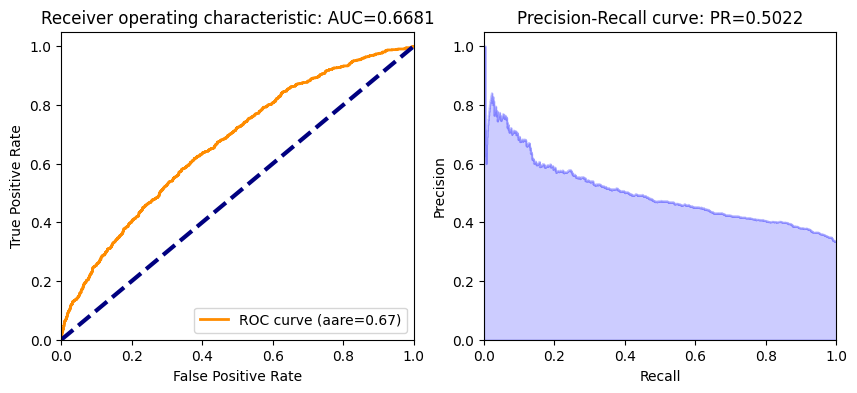

In [81]:
ROC_AUC(rf_v4,smpl_hex,'loan_default')

The AUC value after undersampling is 0.6681. Compared with the RF model without undersampling, we ca see that the model after undersampling works better. However, the PR value is higher than without undersampling, which shows that the model works better without undersampling.

# Oversampling

Oversampling increases the weight of the minority class by replicating the minority class examples.

In [82]:
y0_cnt = len(train_smpl)-train_smpl[target].sum()
y0_cnt
N = 0.5
y1_cnt = int(y0_cnt * N)
y1_cnt

1949

In [83]:
# With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples.
# Originally, there is 64512 samples and 30976 samples are asked.

y0_cnt = len(train_smpl)-train_smpl[target].sum()

from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(sampling_strategy={1:y1_cnt , 0:  y0_cnt})
X_rs, y_rs = sampler.fit_resample(X, y)
smpl = pd.concat([X_rs,y_rs],axis=1)
smpl_hex = h2o.H2OFrame(smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [84]:
rf_v5 = H2ORandomForestEstimator(
    model_id = 'rf_v13',
    ntrees = 500,
    nfolds=10,
    min_rows=100,
    seed=1234)
rf_v5.train(predictors,target,training_frame=smpl_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_v13


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    500                500                         197229                 6            12           7.898         23            30            26.508

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.20699408753413095
RMSE: 0.4549660289891224
MAE: 0.4210138603533512
RMSLE: 0.31964005208768254
Mean Residual Deviance: 0.20699408753413095

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.20803510511515869
RMSE: 0.456108654944366
MAE: 0.42240601328613847
RMSLE: 0.3205048828891738
Mean Residual Deviance: 0.20803510511515869

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.422338   0.00633755  0.42636       0.415719      0.423247      0.422864      0.411537      0.43025       0.42057       0.431097      0.41657       0.425171
mean_residual_deviance  0.207931   0.00682683  0.212055      0.201846      0.209502      0.209097      0.19661       0.218011      0.204097      0.215203      0.200974      0.211911
mse                     0.207931   0.00682683  0.212055      0.201846      0.209502      0.209097      0.19661       0.218011      0.204097      0.215203      0.200974      0.211911
r2                      0.0634669  0.0155247   0.0407025     0.0635507     0.0661743     0.0590636     0.0991859     0.0529095     0.0631203     0.0513146     0.0725236     0.0661245
residual_deviance       0.207931   0.00682683  0.212055      0.201846      0.209502      0.209097      0.19661       0.218011      0.204097      0.215203      0.200974      0.211911
rmse                    0.455939   0.00749882  0.460495      0.449273      0.457714      0.457271      0.443408      0.466917      0.451771      0.4639        0.448301      0.460338
rmsle                   0.320432   0.00365706  0.324154      0.317556      0.320546      0.320965      0.313112      0.324217      0.320074      0.324955      0.317474      0.321264

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  -------------------
     2022-12-07 06:55:05  1 min  5.888 sec  0.0                nan                  nan                  nan
     2022-12-07 06:55:05  1 min  5.901 sec  1.0                0.4614567721013277   0.41852719842448394  0.21294235251817667
     2022-12-07 06:55:05  1 min  5.911 sec  2.0                0.4609399382314692   0.41968131114413687  0.21246562665683066
     2022-12-07 06:55:05  1 min  5.921 sec  3.0                0.4603114566577213   0.42021118685863507  0.21188663713035322
     2022-12-07 06:55:05  1 min  5.931 sec  4.0                0.45994254238041377  0.4193835134360621   0.2115471422913587
     2022-12-07 06:55:05  1 min  5.941 sec  5.0                0.4596892959955157   0.42021933515155674  0.21131424885285285
     2022-12-07 06:55:05  1 min  5.951 sec  6.0                0.4599529903473037   0.42025987599836395  0.21155675332942683
     2022-12-07 06:55:05  1 min  5.961 sec  7.0                0.4594219008100655   0.4202876480619194   0.21106848294393368
     2022-12-07 06:55:05  1 min  5.974 sec  8.0                0.458134

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



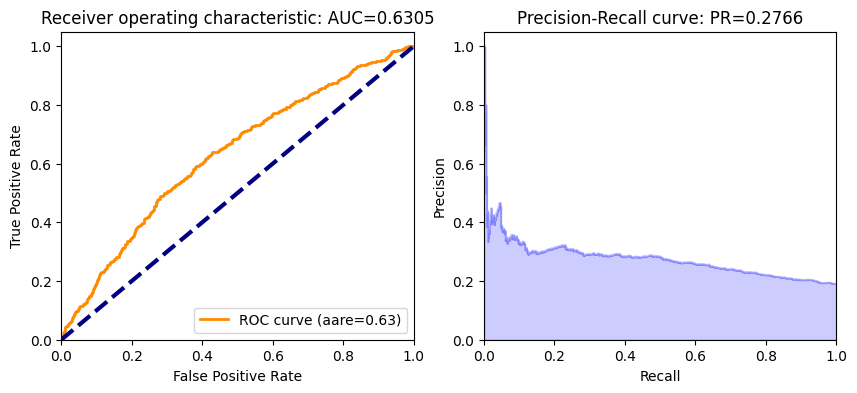

In [85]:
ROC_AUC(rf_v5,test_hex,'loan_default')

From the graph, we can see that the AUC value is 0.6305, which is lower than undersampling, and even lower than no sampling. When looking at the PR value, 0.2766 is between the PR value of undersampling and no sampling. 

Therfore, we can conclude that undersampling works the best as ROC curve and no sampling works the best as precision recall curve. 